In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import VAR
%matplotlib inline
import seaborn as sns
import datetime

E:\Informatika\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
E:\Informatika\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df1 = pd.read_csv("../input/wind_dataset_imputed_and_scaled1.csv")
df1['DATE']=pd.to_datetime(df1['DATE'])
df1 = df1.set_index('DATE')
df1.head()

,WIND,RAIN,T.MAX,T.MIN,T.MIN.G,IND_0,IND_1,IND_4,IND.1_0.0,IND.1_1.0,IND.1_2.0,IND.1_4.0,IND.2_0.0,IND.2_1.0,IND.2_2.0,IND.2_3.0,IND.2_4.0
DATE,,,,,,,,,,,,,,,,,
1961-01-01,0.450115,0.002985,0.356877,0.515254,0.443709,1,0,0,1,0,0,0,1,0,0,0,0
1961-01-02,0.378663,0.076119,0.271375,0.532203,0.513245,1,0,0,1,0,0,0,1,0,0,0,0
1961-01-03,0.370431,0.005970,0.208178,0.406780,0.460265,1,0,0,1,0,0,0,1,0,0,0,0
1961-01-04,0.284162,0.002985,0.211896,0.403390,0.370861,1,0,0,1,0,0,0,1,0,0,0,0
1961-01-05,0.392493,0.155224,0.271375,0.338983,0.228477,1,0,0,1,0,0,0,0,1,0,0,0


In [3]:
df2 = pd.read_csv("../input/wind_dataset_imputed_and_scaled2.csv")
df2['DATE']=pd.to_datetime(df2['DATE'])
df2 = df2.set_index('DATE')
df2.head()

,WIND,RAIN,T.MAX,T.MIN,T.MIN.G,IND_0,IND_1,IND_4,IND.1_0.0,IND.1_1.0,IND.1_2.0,IND.1_4.0,IND.2_0.0,IND.2_1.0,IND.2_2.0,IND.2_3.0,IND.2_4.0
DATE,,,,,,,,,,,,,,,,,
1961-01-01,0.450115,0.002985,0.356877,0.515254,0.443709,1,0,0,1,0,0,0,1,0,0,0,0
1961-01-02,0.378663,0.076119,0.271375,0.532203,0.513245,1,0,0,1,0,0,0,1,0,0,0,0
1961-01-03,0.370431,0.005970,0.208178,0.406780,0.460265,1,0,0,1,0,0,0,1,0,0,0,0
1961-01-04,0.284162,0.002985,0.211896,0.403390,0.370861,1,0,0,1,0,0,0,1,0,0,0,0
1961-01-05,0.392493,0.155224,0.271375,0.338983,0.228477,1,0,0,1,0,0,0,0,1,0,0,0


In [4]:
train_df1, test_df1 = train_test_split(df1, test_size=0.3, shuffle=False)
train_df2, test_df2 = train_test_split(df2, test_size=0.3, shuffle=False)

In [5]:
train_df1.index = pd.DatetimeIndex(train_df1.index.values,freq=train_df1.index.inferred_freq)
train_df2.index = pd.DatetimeIndex(train_df2.index.values,freq=train_df2.index.inferred_freq)

### model fit

In [6]:
model1 = VAR(train_df1)
model2 = VAR(train_df2)

In [7]:
model_fitted1 = model1.fit(5)
model_fitted1.summary()

E:\Informatika\Anaconda\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1416: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 15, Jun, 2022
Time:                     15:38:33
--------------------------------------------------------------------
No. of Equations:         17.0000    BIC:                   -135.416
Nobs:                     4596.00    HQIC:                  -136.742
Log likelihood:           206486.    FPE:                1.99931e-60
AIC:                     -137.462    Det(Omega_mle):     1.45884e-60
--------------------------------------------------------------------
Results for equation WIND
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const           -214694681.177448    495462.129559         -433.322           0.000
L1.WIND                  0.564107         0.015388           36.659           0.000
L1.RAIN                  0.304250         0.03356

In [8]:
model_fitted2 = model2.fit(5)
model_fitted2.summary()

E:\Informatika\Anaconda\lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1416: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 15, Jun, 2022
Time:                     15:38:34
--------------------------------------------------------------------
No. of Equations:         17.0000    BIC:                   -133.071
Nobs:                     4596.00    HQIC:                  -134.397
Log likelihood:           201098.    FPE:                2.08524e-59
AIC:                     -135.118    Det(Omega_mle):     1.52154e-59
--------------------------------------------------------------------
Results for equation WIND
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const           201559623.528053    316968.143352          635.899           0.000
L1.WIND                 0.570136         0.015390           37.047           0.000
L1.RAIN                 0.300153         0.033600    

### forecasting df1

In [9]:
lag_order1 = model_fitted1.k_ar
print(lag_order1)
result_df1 = pd.DataFrame()
# Data on the bridge from train to test
for i in range(0,lag_order1):
    forecast_input = np.concatenate((train_df1.values[-lag_order1 + i:], test_df1.values[:i]))
    fc = model_fitted1.forecast(y=forecast_input, steps=1)
    forecast_df = pd.DataFrame(fc, index=test_df1.index[i:i+1], columns=test_df1.columns)
    result_df1 = pd.concat([result_df1, forecast_df], ignore_index = False, axis = 0)
#data in test
for i in range(0, test_df1.count()[0] - lag_order1):
    forecast_input = test_df1.values[i:i+lag_order1]
    fc = model_fitted1.forecast(y=forecast_input, steps=1)
    forecast_df = pd.DataFrame(fc, index=test_df1.index[i+lag_order1:i+lag_order1+1], columns=test_df1.columns)
    result_df1 = pd.concat([result_df1, forecast_df], ignore_index = False, axis = 0)
result_df1.info()

5
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1973 entries, 1973-08-07 to 1978-12-31
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WIND       1973 non-null   float64
 1   RAIN       1973 non-null   float64
 2   T.MAX      1973 non-null   float64
 3   T.MIN      1973 non-null   float64
 4   T.MIN.G    1973 non-null   float64
 5   IND_0      1973 non-null   float64
 6   IND_1      1973 non-null   float64
 7   IND_4      1973 non-null   float64
 8   IND.1_0.0  1973 non-null   float64
 9   IND.1_1.0  1973 non-null   float64
 10  IND.1_2.0  1973 non-null   float64
 11  IND.1_4.0  1973 non-null   float64
 12  IND.2_0.0  1973 non-null   float64
 13  IND.2_1.0  1973 non-null   float64
 14  IND.2_2.0  1973 non-null   float64
 15  IND.2_3.0  1973 non-null   float64
 16  IND.2_4.0  1973 non-null   float64
dtypes: float64(17)
memory usage: 277.5 KB


<AxesSubplot:xlabel='DATE'>

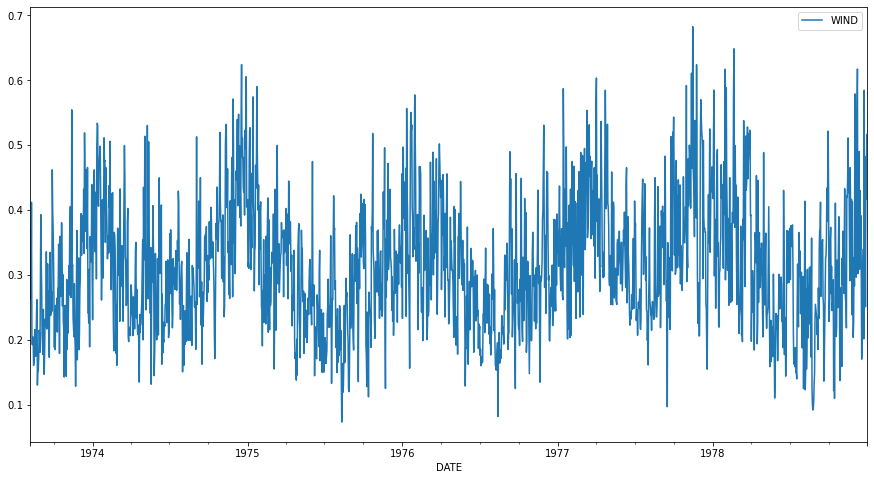

In [10]:
result_df1.plot(y='WIND',figsize=(15,8))

<AxesSubplot:xlabel='DATE'>

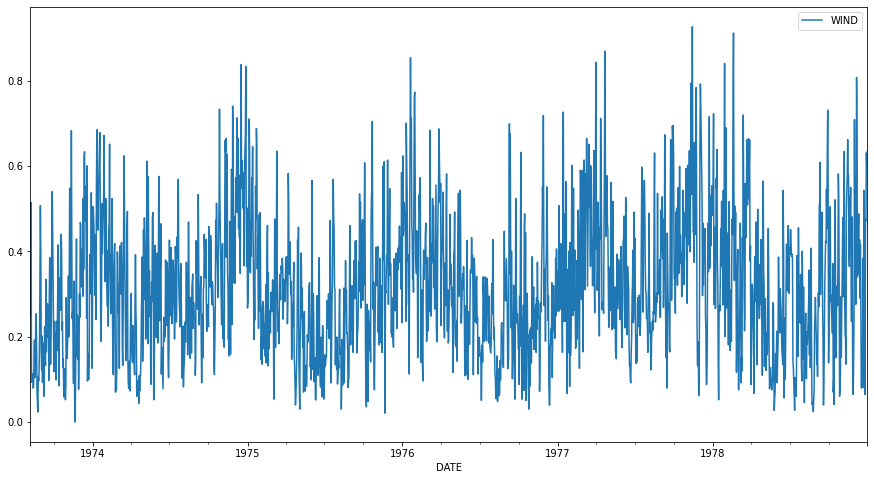

In [11]:
test_df1.plot(y='WIND',figsize=(15,8))

In [12]:
mean_absolute_error(result_df1['WIND'], test_df1['WIND'])

0.09876326437773332

### forecasting df2

In [13]:
lag_order = model_fitted2.k_ar
print(lag_order)
result_df2 = pd.DataFrame()
# Data on the bridge from train to test
for i in range(0,lag_order):
    forecast_input = np.concatenate((train_df2.values[-lag_order + i:], test_df2.values[:i]))
    fc = model_fitted2.forecast(y=forecast_input, steps=1)
    forecast_df = pd.DataFrame(fc, index=test_df2.index[i:i+1], columns=test_df2.columns)
    result_df2 = pd.concat([result_df2, forecast_df], ignore_index = False, axis = 0)
#data in test
for i in range(0, test_df2.count()[0] - 5):
    forecast_input = test_df2.values[i:i+5]
    fc = model_fitted2.forecast(y=forecast_input, steps=1)
    forecast_df = pd.DataFrame(fc, index=test_df2.index[i+5:i+6], columns=test_df2.columns)
    result_df2 = pd.concat([result_df2, forecast_df], ignore_index = False, axis = 0)
result_df2.info()

5
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1973 entries, 1973-08-07 to 1978-12-31
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WIND       1973 non-null   float64
 1   RAIN       1973 non-null   float64
 2   T.MAX      1973 non-null   float64
 3   T.MIN      1973 non-null   float64
 4   T.MIN.G    1973 non-null   float64
 5   IND_0      1973 non-null   float64
 6   IND_1      1973 non-null   float64
 7   IND_4      1973 non-null   float64
 8   IND.1_0.0  1973 non-null   float64
 9   IND.1_1.0  1973 non-null   float64
 10  IND.1_2.0  1973 non-null   float64
 11  IND.1_4.0  1973 non-null   float64
 12  IND.2_0.0  1973 non-null   float64
 13  IND.2_1.0  1973 non-null   float64
 14  IND.2_2.0  1973 non-null   float64
 15  IND.2_3.0  1973 non-null   float64
 16  IND.2_4.0  1973 non-null   float64
dtypes: float64(17)
memory usage: 277.5 KB


<AxesSubplot:xlabel='DATE'>

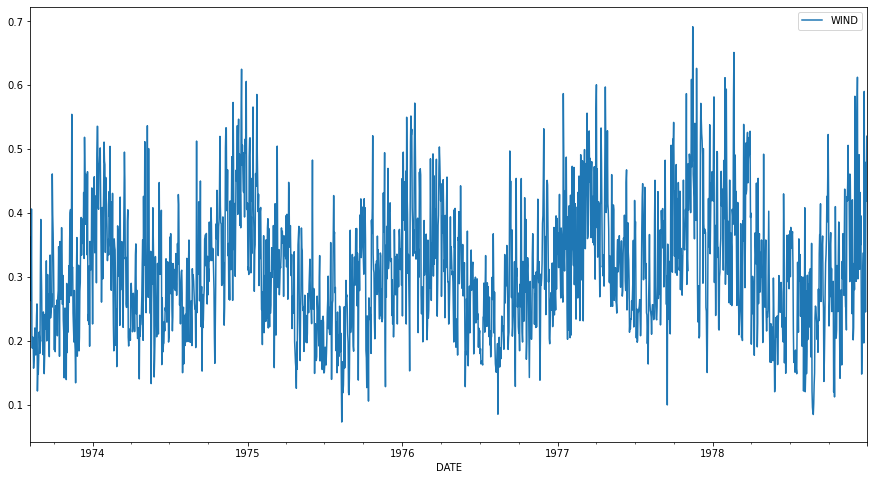

In [14]:
result_df2.plot(y='WIND',figsize=(15,8))

<AxesSubplot:xlabel='DATE'>

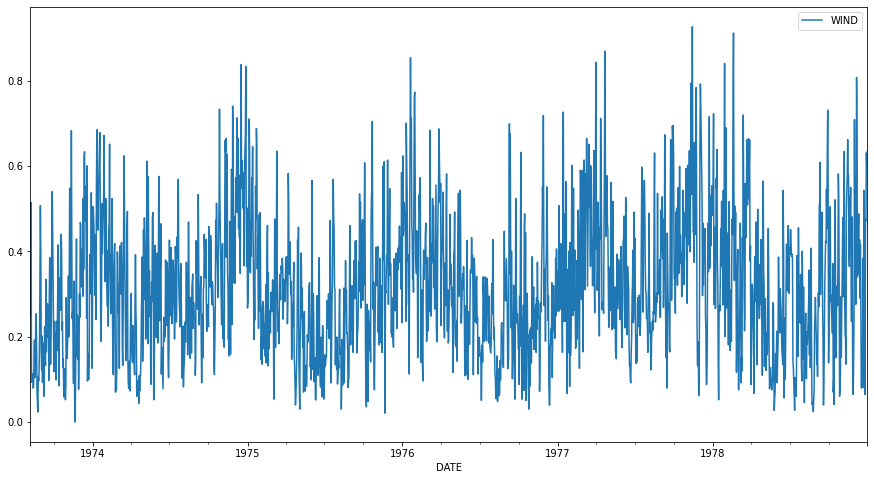

In [15]:
test_df2.plot(y='WIND',figsize=(15,8))

In [16]:
mean_absolute_error(result_df2['WIND'], test_df2['WIND'])

0.09864699734246081